## **Netflix Movie Clustering**

In this notebook we try to cluster netflix shows into various categories based on their description. We use Hierarchical clustering along with various text encoding techniques to find the the optimum number of separable clusters. 
The main metric used to evaluate a cluster is silhoutte score.

The following steps have been performed


1.   Importing Libraries
2.   Loading the Dataset
3.   Data cleaning and subsetting 
4.   Text Preprocessing
5.   Implementing Hierarchical clustering using TF-IDF vectorization
6.   Clustering using decided number of clusters(based on dendrogram) 
7.   Validating results
8.   Implementing Hierarchical clustering using Doc2Vec word embedding
9.  Clustering using decided number of clusters(based on dendrogram)
10.  Validaing results
11.  Implementing Hierarchical clustering using Auto Encoder word embedding
12.  Clustering using decided number of clusters(based on dendrogram)
13.  Validaing results




### **Importing Libraries**

In [24]:
#Basil Libraries
import pandas as pd
import numpy as np

#sklearn libraries
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#tensorflow libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.preprocessing import sequence

#nlp libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Loading Dataset**

In [2]:
netflix_titles = pd.read_csv("netflix_titles.csv")
print("Shape of the dataset: ",netflix_titles.shape)
netflix_titles.head()

Shape of the dataset:  (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **Data Cleaning**

In [3]:
print("Checking for duplicates \n")
print("Number of unique titles:",netflix_titles['title'].nunique())
print("Number of unique show Id:",netflix_titles['show_id'].nunique())
print("\n")

print("Checking for Nulls \n")
netflix_titles.isnull().sum()

Checking for duplicates 

Number of unique titles: 8807
Number of unique show Id: 8807


Checking for Nulls 



show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### **Text Preprocessing**

In [4]:
netflix_titles['description'] = netflix_titles['description'].str.strip()
netflix_titles['description'] = netflix_titles['description'].str.lower()
netflix_titles['description'] = netflix_titles['description'].str.replace('[^a-zA-Z]', ' ',)
netflix_titles['description'] = netflix_titles['description'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


### Implementing Hierarchichal clustering using TF-IDF vectorizer for feature extraction


In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(netflix_titles['description'])
print("Shape of input vector after TF-IDF is applied", X.shape)

Shape of input vector after TF-IDF is applied (8807, 16675)


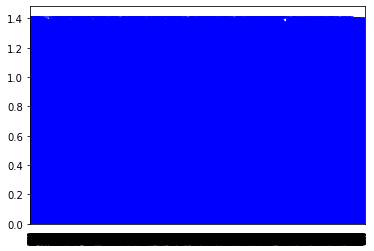

In [8]:
import sys
dendogram = sch.dendrogram(sch.linkage(X.toarray(),method = 'average' ))

No meaningful clusters formed using TF-IDF

### **Implementing Hierarchical clustering using Doc2Vec Word Embedding**

In [10]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(list(netflix_titles['description']))]
model = Doc2Vec(documents, size=300,dm = 1, workers=-1)

X=[model.docvecs[i] for i in range(len(documents))]

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


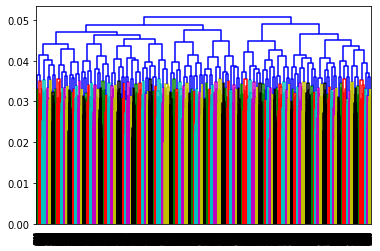

In [11]:
dendogram = sch.dendrogram(sch.linkage(X,method = 'ward' ))


Selecting 7 clusters as the optimal cluster

In [16]:
Hclustering = AgglomerativeClustering(n_clusters= 7, affinity="euclidean",linkage = 'ward')

Hclustering.fit(X)

silhouette_score(X,Hclustering.labels_)

-0.0013102404

### **Implementing Hierarchical clustering using Auto Encoder Word Embedding**

Initializing features

In [17]:
## maximum features to keep (based on frequency)
max_features = 10000
## stop words were already removed before
vectorizer = CountVectorizer(max_features = max_features)
vectorizer.fit(netflix_titles['description']) 
encoded_vectors = vectorizer.transform(netflix_titles['description']) 
encoded_vectors = encoded_vectors.toarray() 
scaler = MinMaxScaler() 
encoded_vectors = scaler.fit_transform(encoded_vectors)
print(encoded_vectors.shape)

(8807, 10000)


Building the auto encoder

In [18]:
## define the encoder
inputs_dim = encoded_vectors.shape[1]
encoder = Input(shape = (inputs_dim, ))
e = Dense(4096, activation = "relu")(encoder)
e = Dense(1024, activation = "relu")(e)
e = Dense(128, activation = "relu")(e)
## bottleneck layer
n_bottleneck = 10
## defining it with a name to extract it later
bottleneck_layer = "bottleneck_layer"
# can also be defined with an activation function, relu for instance
bottleneck = Dense(n_bottleneck, name = bottleneck_layer)(e)
## define the decoder (in reverse)
decoder = Dense(128, activation = "relu")(bottleneck)
decoder = Dense(1024, activation = "relu")(decoder)
decoder = Dense(4096, activation = "relu")(decoder)
## output layer
output = Dense(inputs_dim)(decoder)
## model
model = Model(inputs = encoder, outputs = output)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense (Dense)               (None, 4096)              40964096  
                                                                 
 dense_1 (Dense)             (None, 1024)              4195328   
                                                                 
 dense_2 (Dense)             (None, 128)               131200    
                                                                 
 bottleneck_layer (Dense)    (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dense_4 (Dense)             (None, 1024)              132096

Training the auto encoder

In [19]:
encoder = Model(inputs = model.input, outputs = bottleneck)

model.compile(loss = "mse", optimizer = "adam")
history = model.fit(
    encoded_vectors,
    encoded_vectors,
    batch_size = 256,
    epochs = 10,
    verbose = 1
)

Epoch 1/10
35/35 [==============================] - 95s 3s/step - loss: 0.0011
Epoch 2/10
35/35 [==============================] - 95s 3s/step - loss: 0.0011
Epoch 3/10
35/35 [==============================] - 96s 3s/step - loss: 0.0011
Epoch 4/10
35/35 [==============================] - 95s 3s/step - loss: 0.0011
Epoch 5/10
35/35 [==============================] - 96s 3s/step - loss: 0.0011
Epoch 6/10
35/35 [==============================] - 96s 3s/step - loss: 0.0011
Epoch 7/10
35/35 [==============================] - 96s 3s/step - loss: 0.0011
Epoch 8/10
35/35 [==============================] - 95s 3s/step - loss: 0.0011
Epoch 9/10
35/35 [==============================] - 96s 3s/step - loss: 0.0011
Epoch 10/10
35/35 [==============================] - 96s 3s/step - loss: 0.0011


Creating encoded vector

In [20]:
desc_encoded = encoder.predict(encoded_vectors)
desc_encoded.shape

(8807, 10)

Creating dendrogram using encoded vector

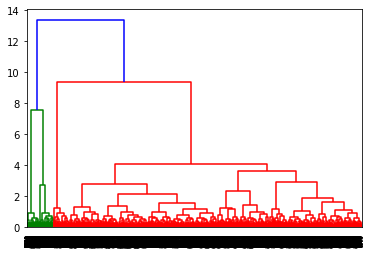

In [21]:
dendogram = sch.dendrogram(sch.linkage(desc_encoded,method = 'ward' ))

Building a model with 6 clusters

In [22]:
Hclustering = AgglomerativeClustering(n_clusters= 6, affinity="euclidean",linkage = 'ward')
Hclustering.fit(desc_encoded)
print("Silhoutte Score: ",silhouette_score(desc_encoded,Hclustering.labels_))
pd.Series(Hclustering.labels_).value_counts()

Silhoutte Score:  0.15489334


1    3891
0    2420
2    1379
5     398
4     391
3     328
dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


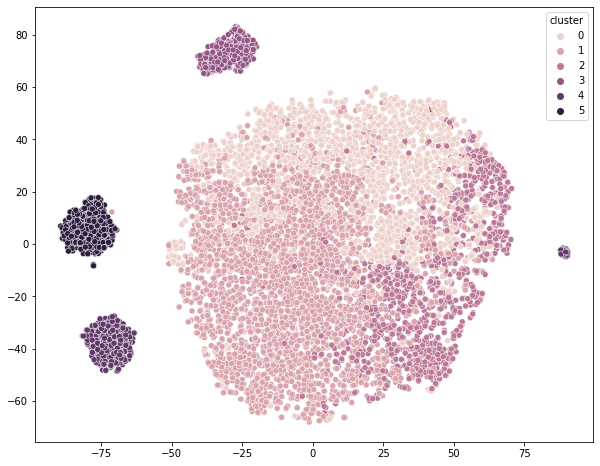

In [25]:
netflix_titles['cluster'] = Hclustering.labels_

tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(desc_encoded)
plt.figure(figsize=(10,8))
sns.scatterplot(tsne_mat[:,0],tsne_mat[:,1],hue=netflix_titles['cluster'],legend = 'full')

In [ ]:
df_temp = pd.read_csv("netflix_titles.csv")
netflix_titles['description'] = df_temp['description']

In [ ]:
netflix_titles.to_csv("netflix_titles_labled.csv")